In [1]:
"""
The purpose of this Jupyter notebook is to investigate the be behaviour
of the individual controls employed in the VACV screen and to assess
their reliability. Moreover, their biological role in VACV infection and
the resulting expected effect of their knockdown is to be determined via
literature research.
"""

'\nThe purpose of this Jupyter notebook is to investigate the be behaviour\nof the individual controls employed in the VACV screen and to assess\ntheir reliability. Moreover, their biological role in VACV infection and\nthe resulting expected effect of their knockdown is to be determined via\nliterature research.\n'

In [2]:
import numpy as np
import pandas as pd

In [3]:
path_to_tsv_with_controls = (
    "/Users/jacobanter/Documents/Code/VACV_screen/Vaccinia_Report_"
    "updated_and_errors_fixed.csv"
)

screen_with_controls_df = pd.read_csv(
    path_to_tsv_with_controls,
    sep="\t"
)

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/3438410942.py:6: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  screen_with_controls_df = pd.read_csv(


In [4]:
# Select the subset of the DataFrame containing the controls and
# determine the unique control names
control_subset_df = screen_with_controls_df[
    screen_with_controls_df["WellType"] == "CONTROL"
]

# For the sake of simplicity, save the subset containing controls to a
# separate TSV file
control_subset_df.to_csv(
    "Vaccinia_Report_controls_subset.tsv",
    sep="\t",
    header=True,
    index=False
)

In [4]:
control_subset_df = pd.read_csv(
    "Vaccinia_Report_controls_subset.tsv",
    sep="\t"
)

In [5]:
# Using set operations, the controls not common to the different columns
# are determined
unique_names = set(control_subset_df["Name"])
unique_ID_openBIS = set(control_subset_df["ID_openBIS"])
unique_PublicationLink_material = set(
    control_subset_df["PublicationLink_material"]
)

# Bear in mind that for the sake of comparability, the "CONTROL:" prefix
# in "PublicationLink_material" has to be removed
unique_PublicationLink_material = set([
    entry.replace("CONTROL:", "")
    for entry in unique_PublicationLink_material
])

print(len(unique_names))
print(len(unique_ID_openBIS))
print(len(unique_PublicationLink_material))

37
34
34


In [6]:
# The columns "ID_openBIS" and "PublicationLink_material" encompass the
# same amount of unique controls; it is determined whether there are
# controls they don't have in common
diff = (
    (unique_ID_openBIS | unique_PublicationLink_material)
    -
    (unique_ID_openBIS & unique_PublicationLink_material)
)

if len(diff) > 0:
    print(
        "Amount of controls the columns \"ID_openBIS\" and "
        "\"PublicationLink_material\"\ndon't have in common: "
        f"{len(diff)}\n"
        "The precise controls they don't have in common are:\n"
        f"{diff}"
    )
else:
    print(
        "The columns \"ID_openBIS\" and \"PublicationLink_material\" "
        "comprise the same controls!"
    )

The columns "ID_openBIS" and "PublicationLink_material" comprise the same controls!


In [7]:
# Now, compare the columns "Name" and "ID_openBIS"
# As the "ID_openBIS" column uses less verbose control names, the names
# used by the "Name" column have to be converted
conversion_dict = {
    "Silencer_Select_Negative_Control_1": "SISEL_NC1",
    "Silencer_Select_Negative_Control_2": "SISEL_NC2",
    "Cytosine Arabinoside - incorporates into DNA and inhibits DNA replication": "ARAC",
    "Cyclohexamine - translation inhibition in eukaryotes": "CHX",
    "MTOR": "FRAP1",
    "AllStars Hs Cell Death siRNA": "ALLSTARDEATH",
    "ON-TARGETplus Non-targeting Pool": "SCRAMBLED",
    "Abi1": "ABI1",
    "egfp": "EGFP",
    "GFP Duplex III": "GFP"
}

unique_names_list = list(unique_names)

for verbose_name, short_name in conversion_dict.items():
    idx = unique_names_list.index(verbose_name)
    unique_names_list[idx] = short_name

unique_names = set(unique_names_list)

diff = (
    (unique_names | unique_ID_openBIS)
    -
    (unique_names & unique_ID_openBIS)
)

if len(diff) > 0:
    print(
        "Amount of controls the columns \"Name\" and \"ID_openBIS\" "
        f"don't have in common: {len(diff)}\n"
        "The precise controls they don't have in common are:\n"
        f"{diff}"
    )
else:
    print(
        "The columns \"Name\" and \"ID_openBIS\" comprise the same "
        "controls!"
    )

The columns "Name" and "ID_openBIS" comprise the same controls!


In [8]:
print(len(unique_names))
print(len(unique_ID_openBIS))
print(len(unique_PublicationLink_material))

34
34
34


In [9]:
print(sorted(unique_names))

['ABI1', 'ABL2', 'ACTB', 'AKT1', 'ALLSTARDEATH', 'ALLSTARSDEATH', 'ARAC', 'ARPC3', 'ATP6V1A', 'CDC42', 'CDH4', 'CHX', 'CSK', 'EGFP', 'FRAP1', 'GFP', 'ITGB1', 'KIF11', 'MAP3K7', 'MET', 'MOCK', 'PAK1', 'PI4KB', 'PSMA6', 'PSMC3', 'PTK2', 'PXN', 'RAC1', 'SCRAMBLED', 'SISEL_NC1', 'SISEL_NC2', 'SRC', 'TSG101', 'UNKNOWN']


In [10]:
# Now, the role the individual genes have in the VACV life cycle or in
# general is investigated in order to deduce the expected behaviour
# Additionally, there unfortunately are inconsistencies for individual
# controls; it is endeavoured to rectify them
#
# ABI1: In the name column, sometimes the name 'Abi1' is used; for the
# sake of consistency, this name is replaces with 'ABI1'
control_subset_df.loc[
    control_subset_df["Name"] == "Abi1", "Name"
] = "ABI1"
#
# ABI1 encodes the Abelson interactor 1; ABI1 is involved in actin
# polymerisation as well as cytoskeletal remodelling; as VACV relies on
# interactions with the cytoskeleton, knockdown of ABI1 is expected to
# diminish the infection efficiency
#
# ABL2 is quite similar to ABI1 in that it is involved cytoskeletal
# remodelling/actin remodelling; thus, knockdown of ABL2 is expected to
# diminish infection efficiency
#
# ACTB encodes beta-actin, one of six different actin isoforms
# identified in humans; as VACV relies on the actin cytoskeleton during
# its lifecycle, knockdown of beta-actin is expected to diminish
# infection efficiency
#
# AKT1 encodes AKT Serine/Threonine Kinase 1 involved in cell survival
# and cytoskeletal remodelling; hence, knockdown of AKT1 increases
# apoptosis and leads to defects in actin remodelling, which is turn is
# expected to diminish infection efficiency
#
# ALLSTARDEATH:
control_subset_df.loc[
    (control_subset_df["ID_openBIS"] == "ALLSTARDEATH")
    &
    (control_subset_df["Name"] == "KIF11"),
    "ID_openBIS"
] = "KIF11"

control_subset_df.loc[
    control_subset_df["ID_openBIS"] == "ALLSTARDEATH",
    "ID_openBIS"
] = "ALLSTARSDEATH"
#
# ALLSTARSDEATH:
#
# ARAC:
#
# ARPC3:
#
# ATP6V1A encodes a subunit of the enzyme vacuolar ATPase, which effects
# the acidification of eukaryotic intracellular organelles; both mature
# virions (MV) and extracellular virions (EV) of VACV rely on the
# acidification of the macropinosome for fusion with the macropinosome
# membrane to take place (https://doi.org/10.1016/j.coviro.2011.11.007);
# thus, knockdown of ATP6V1A prevents virus entry
#
# CDC42 encodes the cell division control protein 42 homolog; as CDC42
# is involved in actin cytoskeletal reorganisation, which VACV exploits,
# its knockdown is expected to diminish infection efficiency
# (https://doi.org/10.1038/nmicrobiol.2016.141)
#
# CDH4 encodes a classical cadherin from the cadherin superfamily, i.e.
# the encoded protein is a calcium-dependent cell-cell adhesion
# glycoprotein; the literature hardly makes any statements regarding
# CDH4's role in VACV lifecycle, but according to genecards.org
# (https://www.genecards.org/cgi-bin/carddisp.pl?gene=CDH4) as well
# as to GenomeRNAi.org (http://www.genomernai.org/v17/singleExp
# Phenotypes/GR00249-S), knockdown of CDH4 results in decreased VACV
# infection
#
# CHX
#
# CSK
#
# EGFP
#
# FRAP1
#
# GFP
#
# ITGB1 encodes the protein integrin beta-1, which is a cell surface
# receptor; this cell surface receptor is known to mediate Vaccinia
# virus entry (https://doi.org/10.1128/jvi.06860-11,
# https://doi.org/10.1007/s00441-009-0834-6); thus, ITGB1 knockdown is
# expected to reduce infection efficiency
#
# KIF11
#
# MAP3K7 encodes the mitogen-activated protein kinase kinase kinase 7; ...
#
# MET
#
# MOCK
#
# PAK1 encodes a kinase involved in cytoskeletal remodelling; thus,
# knockdown of PAK1 is expected to reduce infection efficiency
#
# PI4KB encodes a kinase that plays a role in membrane trafficking and
# lipid signalling; as VACV is known to remodel intracellular membranes
# by means of PI4KB to form replication organelles, PI4KB knockdown is
# expected to reduce infection efficiency
#
# PSMA6 encodes the proteasome subunit alpha type-6; on the one hand,
# the proteasome is required by VACV for genome uncoating and virus
# assembly, as uncovered by Jason Mercer in his publication "RNAi
# Screening Reveals Proteasome- and Cullin3-Dependent Stages in
# Vaccinia Virus Infection"; on the other hand, the proteasome is
# responsible for quality control and degradation of misfolded proteins;
# the resulting accumulation of misfolded proteins may promote
# apoptosis; thus, it is reasonable to assume that knockdown of PSMA6
# reduces infection efficiency (https://doi.org/10.1128/jvi.01986-08)
#
# PSMC3 encodes the 26S protease regulatory subunit 6A, which is a
# subunit of the 19S proteasome complex; as outlined for PSMA6, it is
# reasonable to assume that PSMC3 knockdown reduces infection efficiency
# due to the proteasome's role in uncoating the viral genome
# (https://doi.org/10.1128/jvi.01986-08)
#
# PTK2 encodes the focal adhesion kinase which, as its name already
# suggests, is involved in cellular adhesion and spreading processes;
# since VACV exploits actin-based motility and cell adhesion for spread,
# it is reasonable to assume that PTK2 knockdown impairs viral entry and
# egress and therefore reduces infection efficiency
#
# PXN encodes the protein paxillin, which is involved in adhesion of
# cells to the extracellular matrix and also in the actin cytoskeleton;
# once again, it is reasonable to assume that PXN knockdown diminishes
# infection efficiency
#
# RAC1 encodes the Ras-related C3 botulinum toxin substrate 1, which is
# involved in cytoskeletal remodelling and the actin network, amongst
# others; hence, it is reasonable to assume that RAC1 knockdown
# diminishes infection efficiency (this is corroborated by a
# publication: "https://rupress.org/jcb/article/202/7/1075/37410/The-
# formin-FHOD1-and-the-small-GTPase-Rac1-promote")
#
# SCRAMBLED originates from the siRNA library "ON-TARGETplus
# Non-targeting Pool", which serves as negative control and lends itself
# to the determination of baseline cellular responses (https://
# horizondiscovery.com/en/gene-modulation/knockdown/controls/products
# /on-targetplus-non-targeting-control-pool)
#
# SISEL_NC1 stands for Silencer Select Negative Control 1 and, as its
# name already implies, is a negative control siRNA, i.e. an siRNA not
# targeting any mRNA
#
# SISEL_NC2 stands for Silencer Select Negative Control 2 and, as its
# name already implies, is a negative control siRNA, i.e. an siRNA not
# targeting any mRNA
#
# SRC encodes the proto-oncogene tyrosine-protein kinase Src, which is
# also involved in actin cytoskeleton remodelling (as underpinned by
# multiple publications, such as DOI: 10.1126/science.1101509 and
# https://doi.org/10.1111/j.1462-5822.2005.00613.x); thus, it is
# reasonable to assume that SRC knockdown is detrimental to VACV
# infection
#
# TSG101 is the tumor susceptibility gene 101 that encodes a protein of
# the same name; TSG101 is involved in the ESCRT pathway and thus in the
# formation of multivesicular bodies; as it is known that VACV hijacks
# ESCRT-mediated multivesicular body formation for virus egress (DOI:
# 10.26508/lsa.202000910, https://doi.org/10.1128/jvi.00034-07), it is
# reasonable to assume that TSG101 impairs viral egress and therefore
# infection efficiency
#
# UNKNOWN (self-explanatory, no futher information is provided)

"""
From the publication "RNAi Screening Reveals Proteasome- and
Cullin3-Dependent Stages in Vaccinia Virus Infection":

"Among them, several proteins have been previously implicated in VACV
infection: EGFR, RAC1, PAK1, laminin (LAMA1 and 2), the proteasome,
Tsg101, profilin, and RIPK3 (Chiu et al., 2007; Cho et al., 2009;
Eppstein et al., 1985; Honeychurch et al., 2007; Li et al., 2008;
Locker et al., 2000; Mercer and Helenius, 2008; Mercer et al., 2010;
Satheshkumar et al., 2009; Teale et al., 2009; Villa et al., 2010)."
"""

'\nFrom the publication "RNAi Screening Reveals Proteasome- and\nCullin3-Dependent Stages in Vaccinia Virus Infection":\n\n"Among them, several proteins have been previously implicated in VACV\ninfection: EGFR, RAC1, PAK1, laminin (LAMA1 and 2), the proteasome,\nTsg101, profilin, and RIPK3 (Chiu et al., 2007; Cho et al., 2009;\nEppstein et al., 1985; Honeychurch et al., 2007; Li et al., 2008;\nLocker et al., 2000; Mercer and Helenius, 2008; Mercer et al., 2010;\nSatheshkumar et al., 2009; Teale et al., 2009; Villa et al., 2010)."\n'

In [11]:
unique_ID_openBIS = sorted(set(control_subset_df["ID_openBIS"]))

print(len(unique_ID_openBIS))
print(unique_ID_openBIS)

33
['ABI1', 'ABL2', 'ACTB', 'AKT1', 'ALLSTARSDEATH', 'ARAC', 'ARPC3', 'ATP6V1A', 'CDC42', 'CDH4', 'CHX', 'CSK', 'EGFP', 'FRAP1', 'GFP', 'ITGB1', 'KIF11', 'MAP3K7', 'MET', 'MOCK', 'PAK1', 'PI4KB', 'PSMA6', 'PSMC3', 'PTK2', 'PXN', 'RAC1', 'SCRAMBLED', 'SISEL_NC1', 'SISEL_NC2', 'SRC', 'TSG101', 'UNKNOWN']


In [12]:
# Update the DataFrame after speaking with Artur
control_subset_df.to_csv(
    "Vaccinia_Report_controls_subset_corrected.tsv",
    sep="\t",
    header=True,
    index=False
)

In [12]:
control_subset_df = pd.read_csv(
    "Vaccinia_Report_controls_subset_corrected.tsv",
    sep="\t"
)

In [13]:
# Unfortunately, the Z-scored columns are not populated continuously
# Therefore, it is tried to reproduce available Z-scored values and to
# compute the missing values in a subsequent step
# As it is assumed that all values have been taken into account for the
# computation of Z-scores, the corresponding TSV file has to be loaded
path_to_original_VACV_report = (
    "/Users/jacobanter/Documents/Code/VACV_screen/VacciniaReport_"
    "20170223-0958_ZScored_conc_and_NaN_adjusted.csv"
)

pan_VACV_report_df = pd.read_csv(
    path_to_original_VACV_report,
    sep="\t"
)

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/1092982373.py:11: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  pan_VACV_report_df = pd.read_csv(


In [14]:
# Computation of Z-scores requires the mean as well as the standard
# deviation
# Two scenarios are possible, the first of which is that the mean and
# the standard deviation have been computed on a column-wise basis, and
# the second of which is that the mean and the standard deviation have
# been computed across all raw intensity values
# The early intensity of the nucleus is considered
print(
    np.isnan(pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"]).any()
)
print(pan_VACV_report_df.index[
    np.isnan(pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"])
])
print()

# Determine all non-Z-scored intensity columns
non_Z_scored_int_cols = [
    column for column in pan_VACV_report_df.columns
    if
    ("Intensity" in column)
    and
    ("ZScore" not in column)
]

all_vals_mean = np.nanmean(
    pan_VACV_report_df[non_Z_scored_int_cols]
)
all_vals_std = np.nanstd(
    pan_VACV_report_df[non_Z_scored_int_cols]
)

print(
    "Mean and standard deviation when taking the entire screen into "
    "account:\n"
    f"Mean: {all_vals_mean}\n"
    f"Standard deviation: {all_vals_std}\n\n"
)

early_nucleus_mean = np.nanmean(
    pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"]
)
early_nucleus_std = np.nanstd(
    pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"]
)

print(
    "Mean and standard deviation when considering only the early "
    "nucleus intensity:\n"
    f"Mean: {early_nucleus_mean}\n"
    f"Standard deviation: {early_nucleus_std}"
)

True
Index([189742], dtype='int64')

Mean and standard deviation when taking the entire screen into account:
Mean: 0.03815242742048033
Standard deviation: 0.014994957722138392


Mean and standard deviation when considering only the early nucleus intensity:
Mean: 0.04704850531974351
Standard deviation: 0.017912704401231796


In [15]:
# Attempt to reproduce a couple of Z-scores
# Excel tends to display the values incorrectly; therefore, they are
# retrieved via Pandas
ints_with_Z_score_df = pan_VACV_report_df.loc[
    (~np.isnan(pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"]))
    &
    (~np.isnan(pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"]))
]
raw_vals_early_nucleus_int = ints_with_Z_score_df[
    "dIntensity_cPathogen_eMean_oNuclei"
].iloc[:15].values

Z_scores_in_table = ints_with_Z_score_df[
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
].iloc[:15].values

for raw_val, Z_score_in_table in zip(
    raw_vals_early_nucleus_int, Z_scores_in_table
):
    Z_score_on_col_basis = (raw_val - early_nucleus_mean) / early_nucleus_std
    Z_score_all_vals = (raw_val - all_vals_mean) / all_vals_std

    print(f"Z-score found in table: {Z_score_in_table}")
    print(f"Z-score computed on column-basis: {Z_score_on_col_basis}")
    print(f"Z-score computed for all values: {Z_score_all_vals}")
    print()

Z-score found in table: 0.19646
Z-score computed on column-basis: -1.2569824642556575
Z-score computed for all values: -0.9082971538073821

Z-score found in table: 0.86373
Z-score computed on column-basis: -1.1512647592356509
Z-score computed for all values: -0.7820087017096361

Z-score found in table: -0.25405
Z-score computed on column-basis: -1.3283580629012803
Z-score computed for all values: -0.9935611487910019

Z-score found in table: -0.13797
Z-score computed on column-basis: -1.3099672050709381
Z-score computed for all values: -0.9715917637414108

Z-score found in table: 0.62131
Z-score computed on column-basis: -1.189672136736543
Z-score computed for all values: -0.8278894579443986

Z-score found in table: -1.048
Z-score computed on column-basis: -1.4541414147353597
Z-score computed for all values: -1.1438196584681262

Z-score found in table: -0.36817
Z-score computed on column-basis: -1.3464385265066379
Z-score computed for all values: -1.0151597425317394

Z-score found in ta

In [16]:
# While there always is a discrepancy, the Z-scores based on the entire
# screen tend to be closer to the ones deposited in the table
# Thus, the Z-scores for early and late nucleus intensity are
# re-computed and utilised for the visualisation of control behaviour
pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"] = (
    (pan_VACV_report_df["dIntensity_cPathogen_eMean_oNuclei"]
      - all_vals_mean)
    /
    all_vals_std
)

pan_VACV_report_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"] = (
    (pan_VACV_report_df["dIntensity_cLatePathogen_eMean_oNuclei"]
     - all_vals_mean)
    /
    all_vals_std
)

control_subset_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"] = (
    (control_subset_df["dIntensity_cPathogen_eMean_oNuclei"]
     - all_vals_mean)
    /
    all_vals_std
)

control_subset_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"] = (
    (control_subset_df["dIntensity_cLatePathogen_eMean_oNuclei"]
     - all_vals_mean)
    /
    all_vals_std
)

In [17]:
# For each control, determine the mean as well as the standard deviation
# of the early and late intensity and the cell count
early_val_pair_list = []
late_val_pair_list = []
cell_count_val_pair_list = []

for control_name in unique_ID_openBIS:
    current_control_df = control_subset_df.loc[
        control_subset_df["ID_openBIS"] == control_name
    ]

    early_int_mean = np.mean(
        current_control_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"]
    )
    early_int_std = np.std(
        current_control_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"]
    )
    early_val_pair_list.append((early_int_mean, early_int_std))

    late_int_mean = np.mean(
        current_control_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"]
    )
    late_int_std = np.std(
        current_control_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"]
    )
    late_val_pair_list.append((late_int_mean, late_int_std))

    cell_count_mean = np.mean(
        current_control_df["eCount_oCells"]
    )
    cell_count_std = np.std(
        current_control_df["eCount_oCells"]
    )
    cell_count_val_pair_list.append((cell_count_mean, cell_count_std))

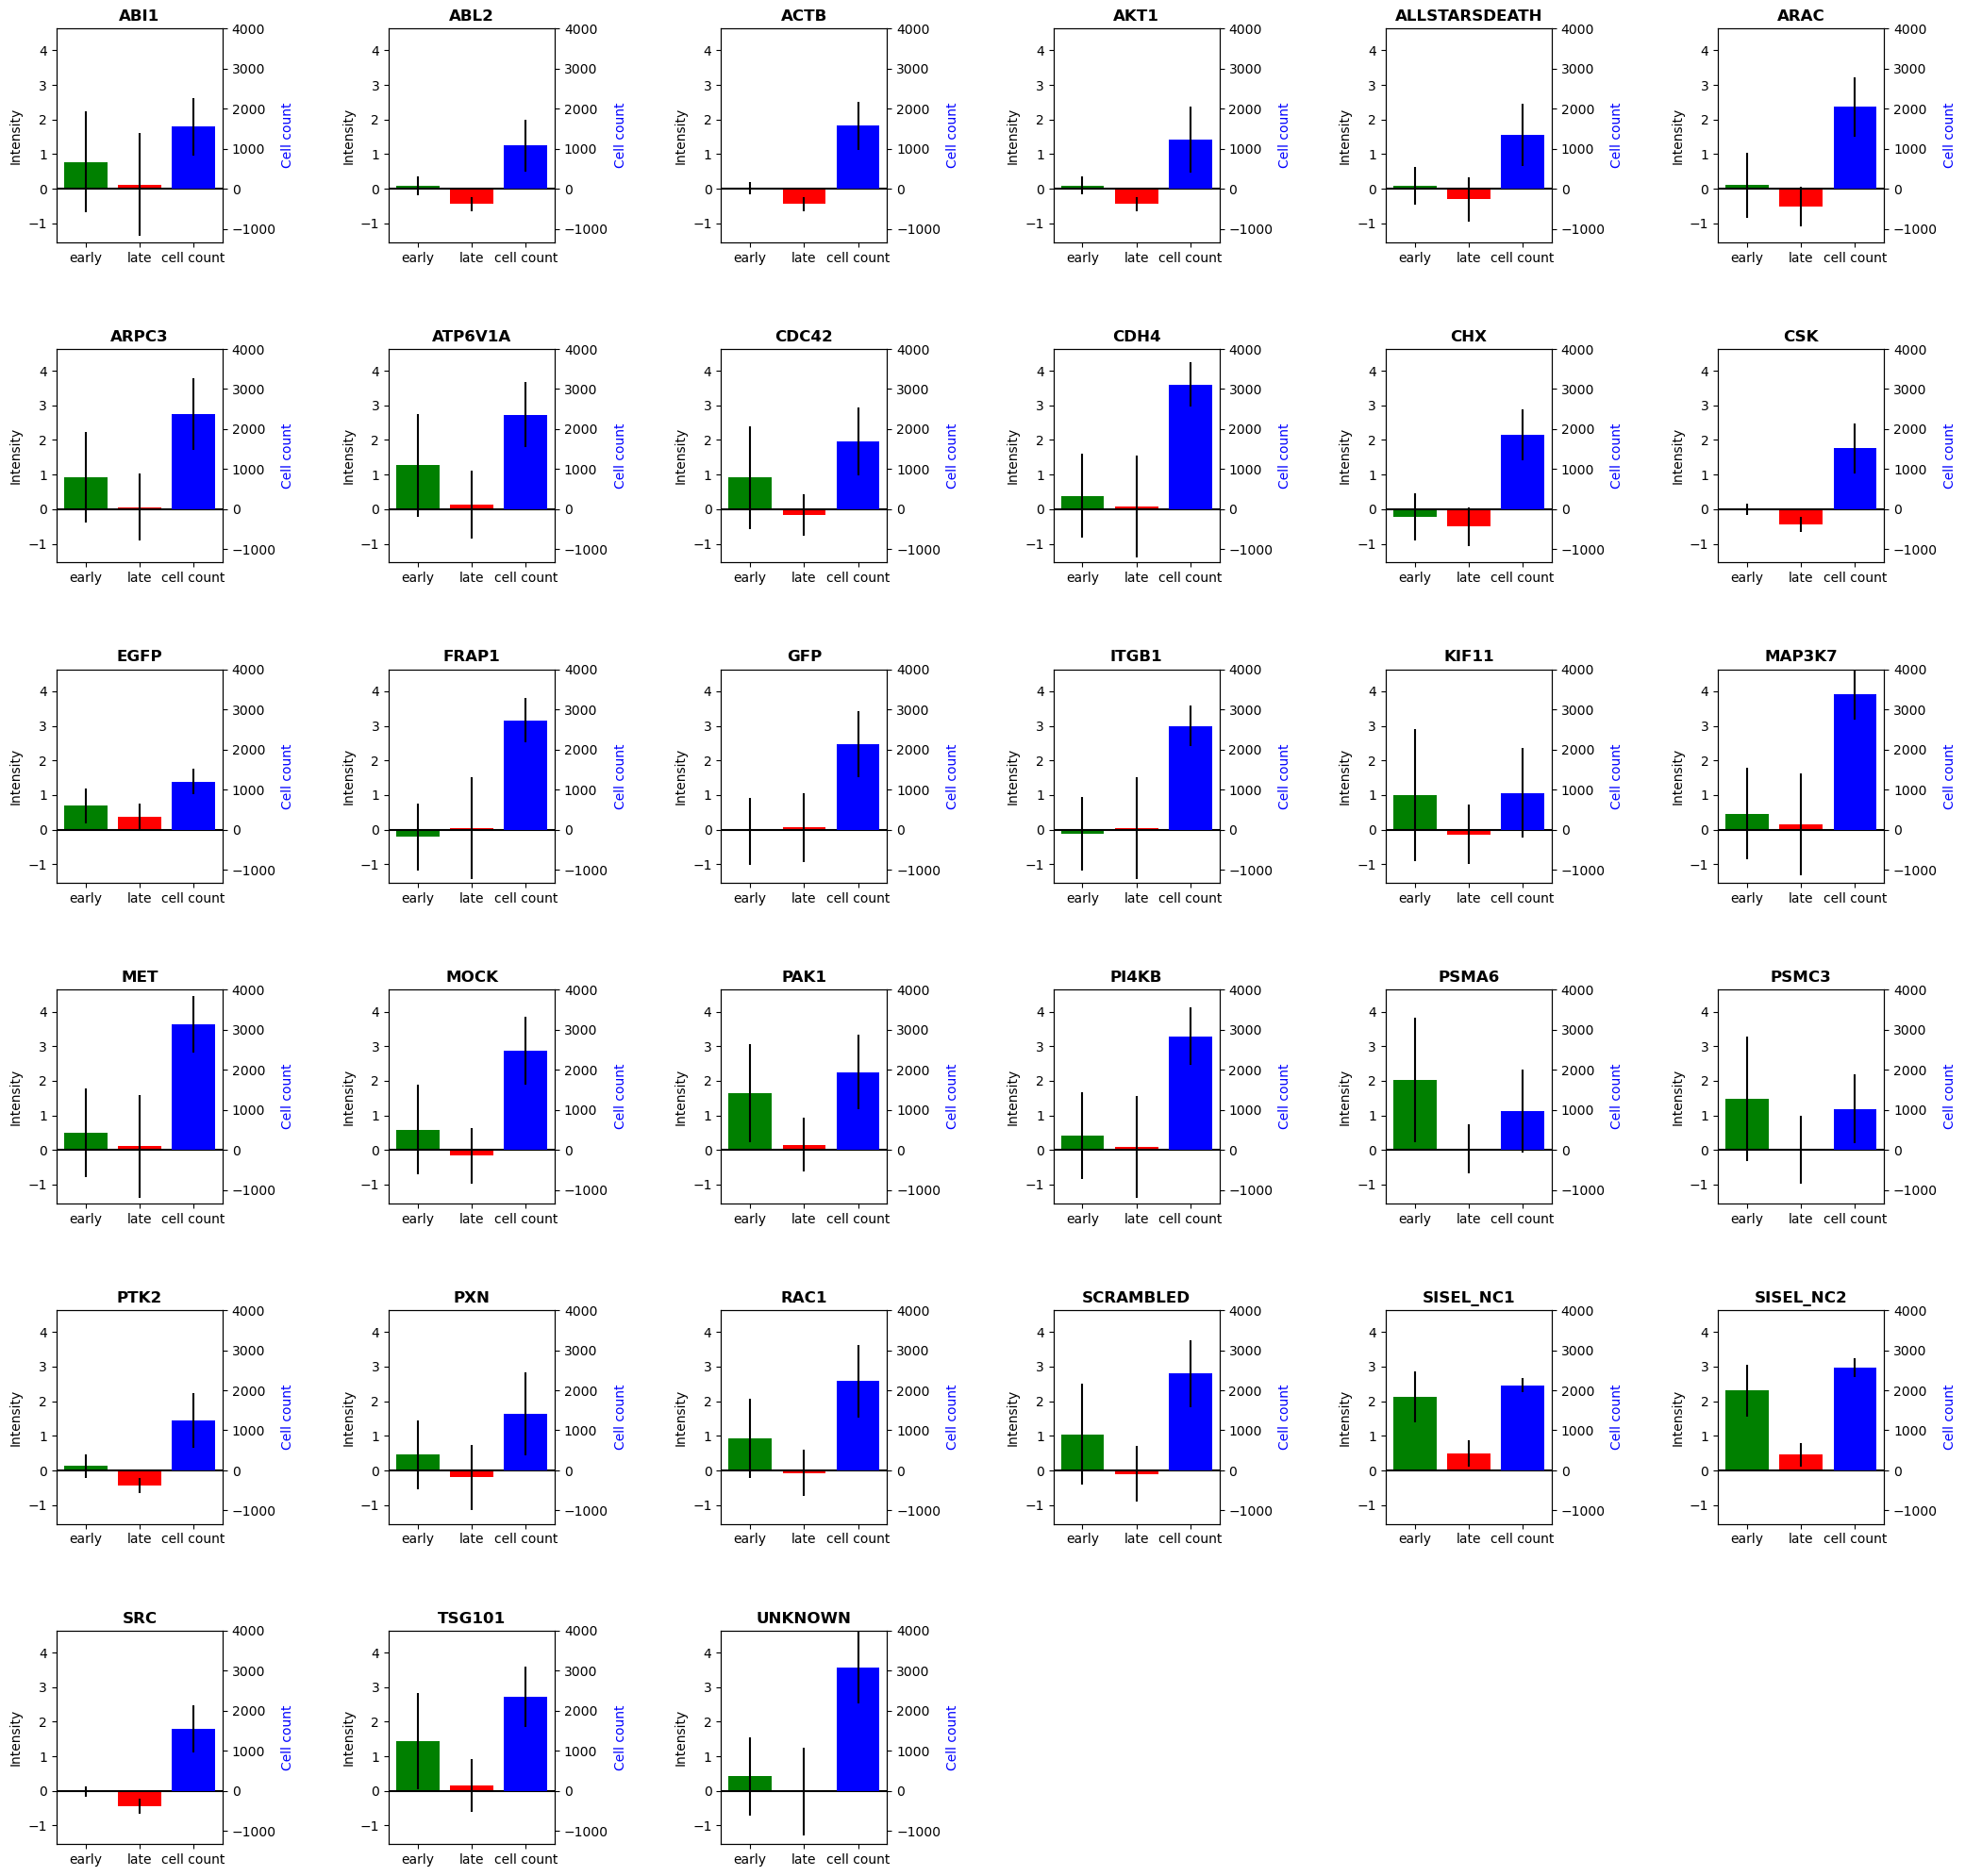

In [18]:
import math

from matplotlib import pyplot as plt
from mpl_axes_aligner import align

# The early and late intensities are visualised by means of a bar plot
# As there are 33 controls in total, the figure is split across multiple
# rows with each row encompassing at most 6 controls
n_rows = math.ceil(len(unique_ID_openBIS) / 6)

fig, axs = plt.subplots(n_rows, 6, sharey=True, figsize=(25, 25))

for i, ax in enumerate(axs.flat):
    if i < len(unique_ID_openBIS):
        control_name = unique_ID_openBIS[i]

        early_mean, early_std = early_val_pair_list[i]
        late_mean, late_std = late_val_pair_list[i]
        cell_count_mean, cell_count_std = cell_count_val_pair_list[i]

        ax.set_title(control_name, fontweight="bold")
        ax.set_ylabel("Intensity")

        ax.bar(
            x=range(2),
            height=[early_mean, late_mean],
            align="center",
            color=["green", "red"],
            yerr=[early_std, late_std]
        )
        ax.axhline(0, color="black")

        ax.yaxis.set_tick_params(labelleft=True)

        twin_ax = ax.twinx()
        twin_ax.bar(
            x=2,
            height=cell_count_mean,
            yerr=cell_count_std,
            align="center",
            color="blue"
        )

        twin_ax.set_xticks(range(3))
        twin_ax.set_xticklabels(["early", "late", "cell count"])

        twin_ax.set_ylim(top=4000)

        twin_ax.set_ylabel("Cell count")
        twin_ax.yaxis.label.set_color("blue")

        align.yaxes(ax, 0, twin_ax, 0, 0.25)
    else:
        ax.set_axis_off()

fig.subplots_adjust(hspace=0.5, wspace=1)

plt.show()

fig.savefig("bar_plots_screen_controls.png", dpi=300)

In [18]:
# Repeat the procedure for exclusively correct measurements
correct_measurements_only_df = pan_VACV_report_df.loc[
    pan_VACV_report_df["WELL_QUALITY_STATUS"] != "BAD"
]

all_vals_mean_corr_meas_only = np.nanmean(
    correct_measurements_only_df[non_Z_scored_int_cols]
)
all_vals_std_corr_meas_only = np.nanstd(
    correct_measurements_only_df[non_Z_scored_int_cols]
)

print(
    "Mean and standard deviation when taking the entire screen into "
    "account\nand exluding incorrect measurements:\n"
    f"Mean: {all_vals_mean_corr_meas_only}\n"
    f"Standard deviation: {all_vals_std_corr_meas_only}\n\n"
)

control_subset_df = control_subset_df.loc[
    control_subset_df["WELL_QUALITY_STATUS"] != "BAD"
]

control_subset_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"] = (
    (control_subset_df["dIntensity_cPathogen_eMean_oNuclei"]
     - all_vals_mean_corr_meas_only)
    /
    all_vals_std_corr_meas_only
)

control_subset_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"] = (
    (control_subset_df["dIntensity_cLatePathogen_eMean_oNuclei"]
     - all_vals_mean_corr_meas_only)
    /
    all_vals_std_corr_meas_only
)

# For each control, determine the mean as well as the standard deviation
# of the early and late intensity and the cell count
early_val_pair_list = []
late_val_pair_list = []
cell_count_val_pair_list = []

for control_name in unique_ID_openBIS:
    current_control_df = control_subset_df.loc[
        control_subset_df["ID_openBIS"] == control_name
    ]

    early_int_mean = np.mean(
        current_control_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"]
    )
    early_int_std = np.std(
        current_control_df["dIntensity_cPathogen_eMean_oNuclei_nZScore"]
    )
    early_val_pair_list.append((early_int_mean, early_int_std))

    late_int_mean = np.mean(
        current_control_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"]
    )
    late_int_std = np.std(
        current_control_df["dIntensity_cLatePathogen_eMean_oNuclei_nZScore"]
    )
    late_val_pair_list.append((late_int_mean, late_int_std))

    cell_count_mean = np.mean(
        current_control_df["eCount_oCells"]
    )
    cell_count_std = np.std(
        current_control_df["eCount_oCells"]
    )
    cell_count_val_pair_list.append((cell_count_mean, cell_count_std))

Mean and standard deviation when taking the entire screen into account
and exluding incorrect measurements:
Mean: 0.03862122834383913
Standard deviation: 0.015658618323161292




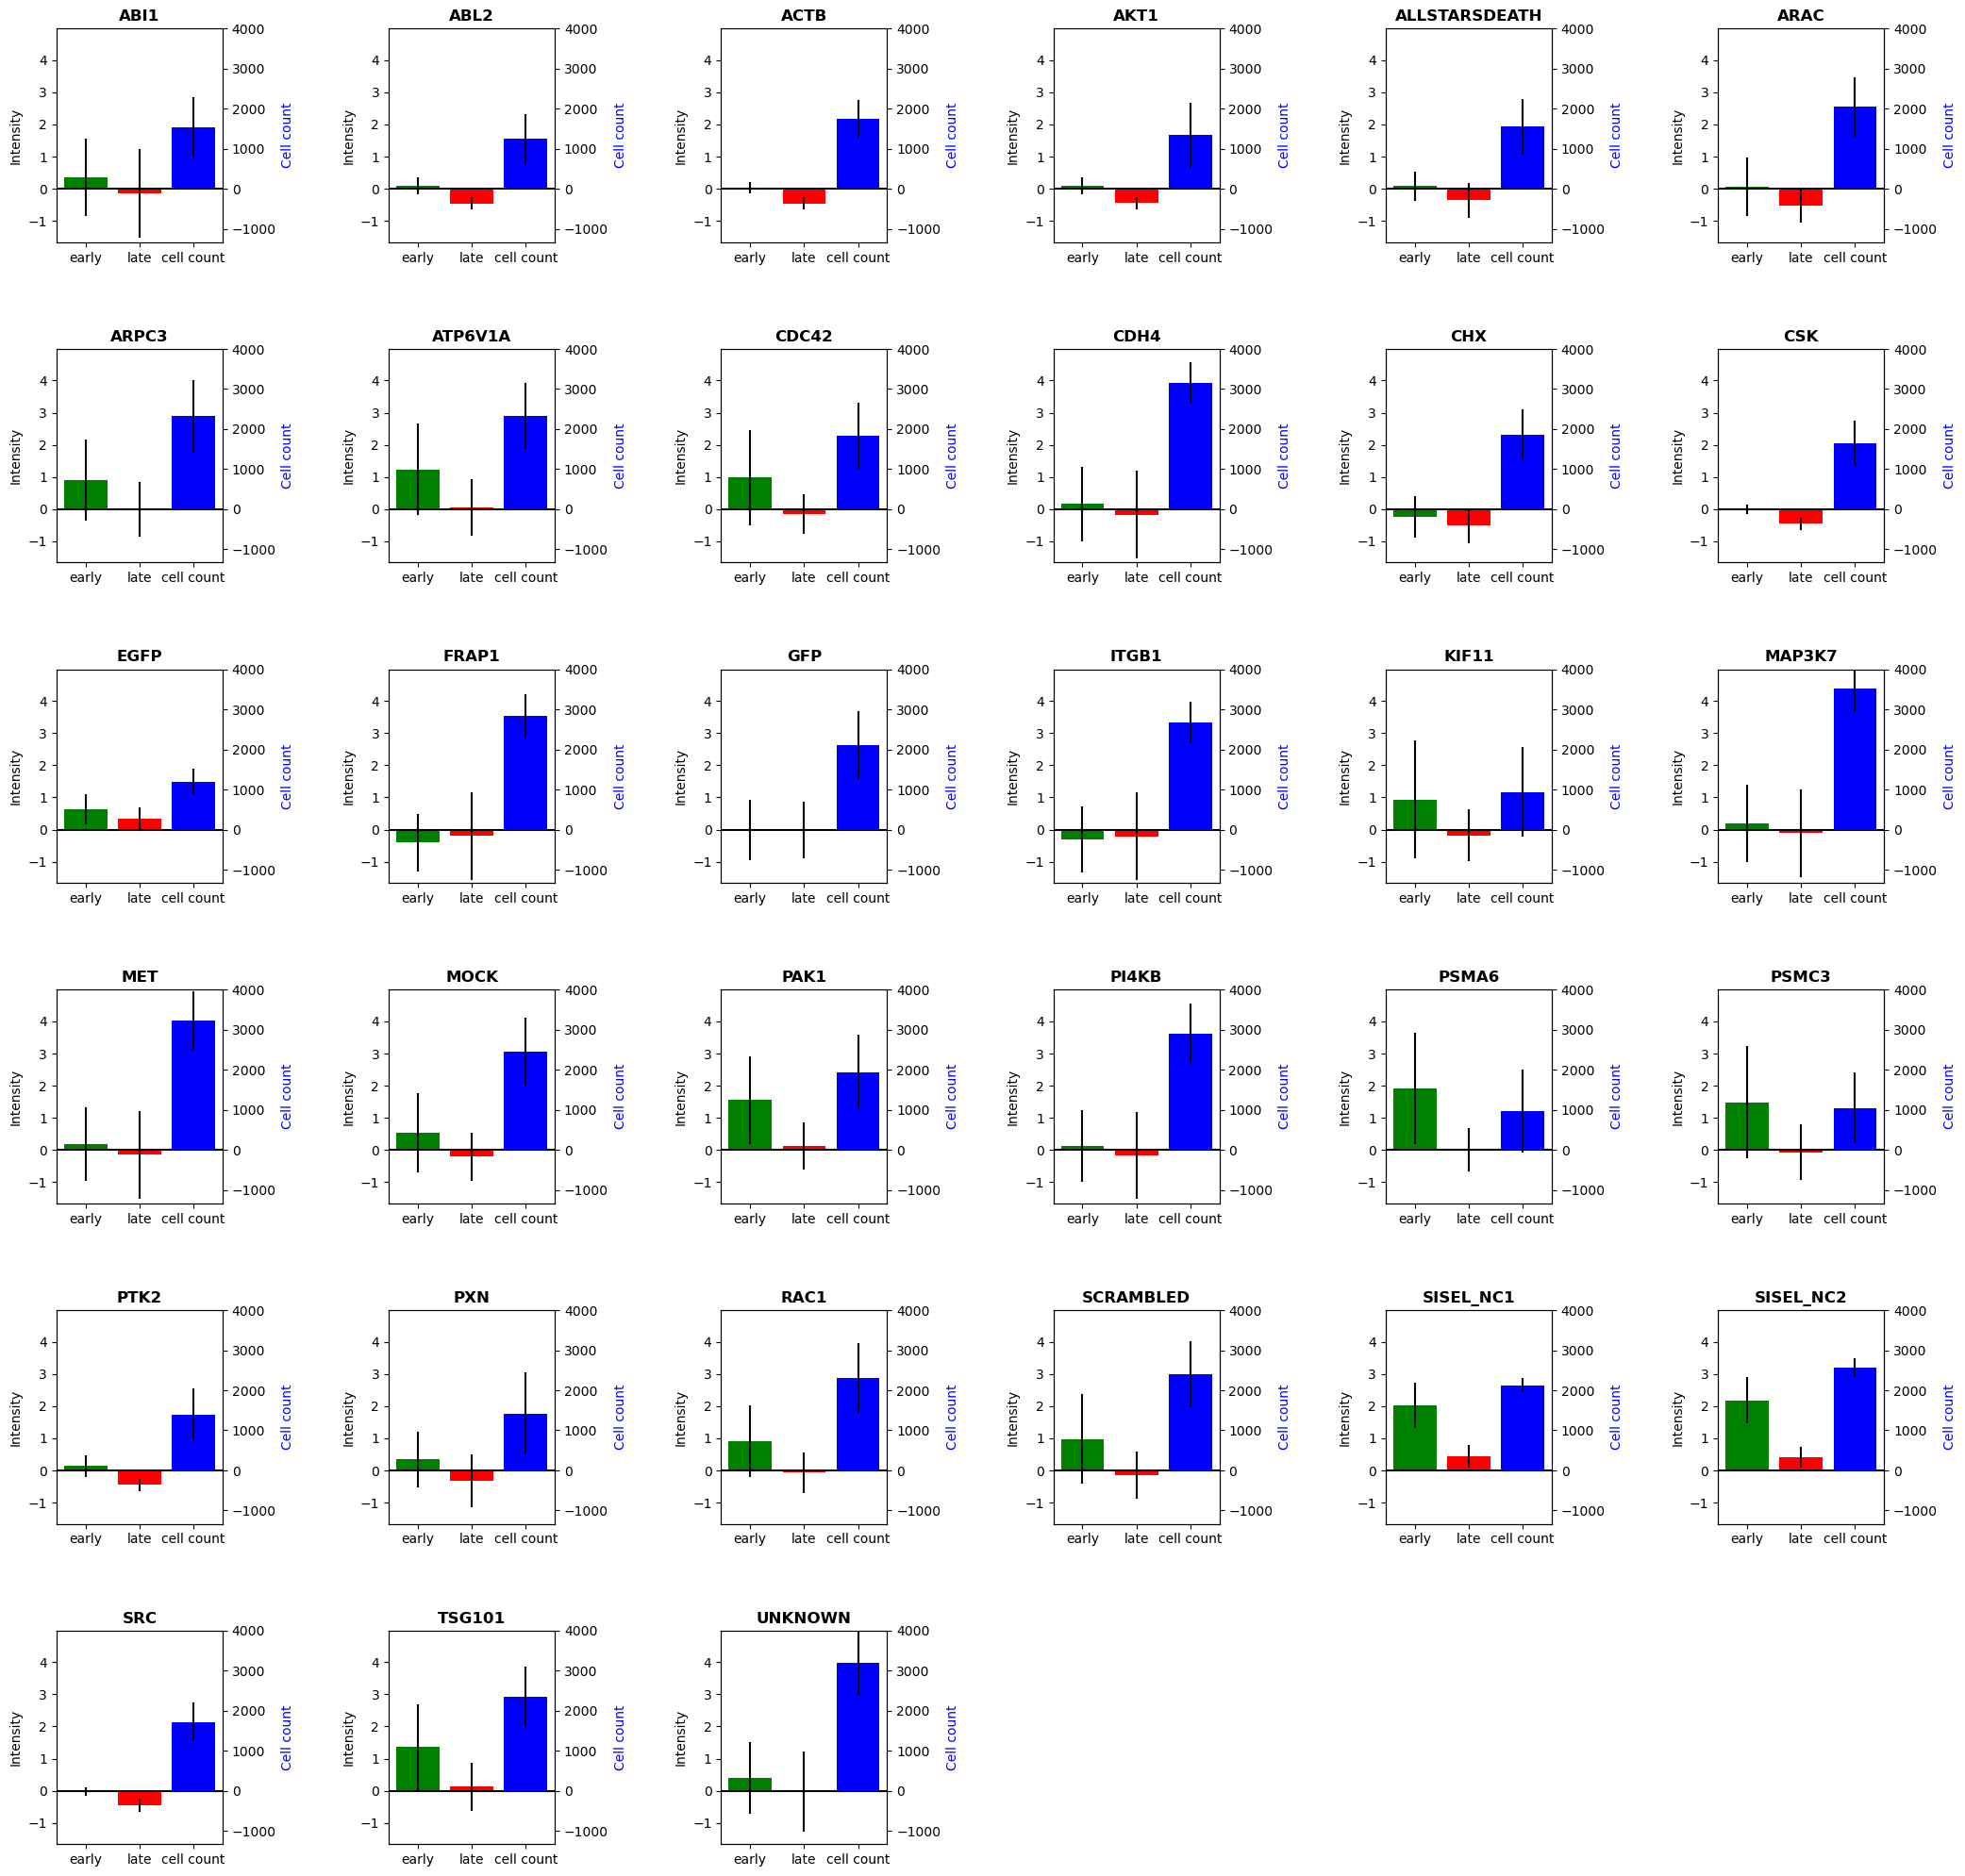

In [18]:
import math

from matplotlib import pyplot as plt
from mpl_axes_aligner import align

n_rows = math.ceil(len(unique_ID_openBIS) / 6)

fig, axs = plt.subplots(n_rows, 6, sharey=True, figsize=(25, 25))

for i, ax in enumerate(axs.flat):
    if i < len(unique_ID_openBIS):
        control_name = unique_ID_openBIS[i]

        early_mean, early_std = early_val_pair_list[i]
        late_mean, late_std = late_val_pair_list[i]
        cell_count_mean, cell_count_std = cell_count_val_pair_list[i]

        ax.set_title(control_name, fontweight="bold")
        ax.set_ylabel("Intensity")

        ax.bar(
            x=range(2),
            height=[early_mean, late_mean],
            align="center",
            color=["green", "red"],
            yerr=[early_std, late_std]
        )
        ax.axhline(0, color="black")

        ax.yaxis.set_tick_params(labelleft=True)

        twin_ax = ax.twinx()
        twin_ax.bar(
            x=2,
            height=cell_count_mean,
            yerr=cell_count_std,
            align="center",
            color="blue"
        )

        twin_ax.set_xticks(range(3))
        twin_ax.set_xticklabels(["early", "late", "cell count"])

        twin_ax.set_ylim(top=4000)

        twin_ax.set_ylabel("Cell count")
        twin_ax.yaxis.label.set_color("blue")

        align.yaxes(ax, 0, twin_ax, 0, 0.25)
    else:
        ax.set_axis_off()

fig.subplots_adjust(hspace=0.5, wspace=1)

plt.show()

fig.savefig(
    "bar_plots_screen_controls_without_WELL_QUALITY_STATUS_BAD.png",
    dpi=300
)

In [19]:
# As discussed in the o2o with Artur on the 3rd of April 2025, I should
# consider one plate at a time in order to get rid of batch-to-batch
# variation/liquid handling variability, i.e. I am supposed to compute
# Z-scores within a plate
# I am also supposed to distinguish between early and late signal, i.e.
# greeen (eGFP) and red (mCherry)
# In summary, for a single plate, all early intensities are pooled and
# the mean and the standard deviation are computed, all late intensities
# are pooled and the mean and the standard deviation are computed, etc.

# Determine unique plates (by means of the `Barcode` column)
plate_ids = np.unique(pan_VACV_report_df["Barcode"])

print(
    f"Amount of plates in the control subset: {len(plate_ids)}"
)

print("The individual plates IDs are as follows:")
n_wells_per_plate = []
for plate_id in plate_ids:
    plate_subset_df = pan_VACV_report_df[
        pan_VACV_report_df["Barcode"] == plate_id
    ]
    # One plate is supposed to comprise 384 wells; it is checked whether
    # this indeed is the case
    n_wells = len(plate_subset_df)
    n_wells_per_plate.append(n_wells)

    print(plate_id, n_wells == 384)

print()
print(
    "All plates comprise 384 wells: "
    f"{all([n_wells == 384 for n_wells in n_wells_per_plate])}"
)

Amount of plates in the control subset: 534
The individual plates IDs are as follows:
BB01-1M True
BB02-1M True
BB03-1M True
BB03-1N True
BZIX-099 True
BZIX-100 True
BZIX-101 True
BZIX-102 True
BZIX-103 True
BZIX-104 True
BZJA-04 True
BZJA-05 True
BZJA-06 True
BZJA-07 True
BZJA-08 True
BZJA-09 True
BZJA-10 True
BZJA-11 True
BZJA-12 True
BZJA-13 True
BZJA-14 True
BZJA-15 True
BZJA-16 True
BZJA-17 True
BZJA-20 True
BZJA-21 True
BZJA-22 True
BZJA-23 True
BZJA-24 True
BZJA-25 True
BZJA-29 True
CB01-1B09A True
CB01-1B11A True
CB01-1D09A True
CB01-1D11A True
CB02-1B09A True
CB02-1B11A True
CB02-1D09A True
CB02-1D11A True
CB0X-1X09A True
CB0X-1X11A True
DZ01-2M True
DZ01-2N True
DZ02-2M True
DZ02-2N True
DZ03-2M True
DZ03-2N True
DZ04-2M True
DZ04-2N True
DZ05-2M True
DZ05-2N True
DZ06-2M True
DZ06-2N True
DZ07-2M True
DZ07-2N True
DZ08-2M True
DZ08-2N True
DZ09-2M True
DZ09-2N True
DZ10-2M True
DZ10-2N True
DZ11-2M True
DZ11-2N True
DZ12-2M True
DZ12-2N True
DZ13-2M True
DZ13-2N True
DZ14-2M

In [20]:
# It emerges that all plates encompass 384 wells
# However, when performing this test on `control_subset_df`, this is not
# the case
# It is conceivable that the respective plates do not exclusively
# harbour controls, but also actual siRNA experiments

# For each control, the amount of plates they are located on is
# determined
n_plates_per_control = []

for control in unique_ID_openBIS:
    current_control_df = control_subset_df[
        control_subset_df["ID_openBIS"] == control
    ]

    n_plates = len(np.unique(current_control_df["Barcode"]))
    n_plates_per_control.append(n_plates)
    print(n_plates)

68
186
186
186
233
52
273
273
391
68
52
186
18
68
255
68
273
68
68
283
178
68
178
246
186
254
364
255
18
18
186
178
102


In [21]:
# It becomes apparent that the individual controls are distributed
# across multiple plates
# Thus, even one and the same control has to be dealt with on a per
# plate basis

# Compute the mean as well as the standard deviation for each plate
# As a preliminary step, the names of columns harbouring early and late
# measurements are determined, respectively
# To this end, the non-Z-scored column names stored in
# `non_Z_scored_int_cols` are used
non_Z_scored_early_cols = [
    col_name for col_name in non_Z_scored_int_cols
    if "Late" not in col_name
]
non_Z_scored_late_cols = [
    col_name for col_name in non_Z_scored_int_cols
    if "Late" in col_name
]

early_val_pair_per_plate = []
late_val_pair_per_plate = []

for plate_id in plate_ids:
    plate_subset_df = pan_VACV_report_df[
        pan_VACV_report_df["Barcode"] == plate_id
    ]

    # Bear in mind that green (early gene expression) has to be treated
    # separately from red (late gene expression)
    # Some rows contain NaN as intensity value, which is why the NaN
    # versions of the NumPy functions for mean and standard deviation
    # are used
    current_early_mean = np.nanmean(
        plate_subset_df[non_Z_scored_early_cols]
    )
    current_early_std = np.nanstd(
        plate_subset_df[non_Z_scored_early_cols]
    )
    early_val_pair_per_plate.append((current_early_mean, current_early_std))

    current_late_mean = np.nanmean(
        plate_subset_df[non_Z_scored_late_cols]
    )
    current_late_std = np.nanmean(
        plate_subset_df[non_Z_scored_late_cols]
    )
    late_val_pair_per_plate.append((current_late_mean, current_late_std))

In [22]:
# Verify that the NaN functions from NumPy served their purpose, i.e.
# that all means and standard deviations are different from NaN
print(
    "All early means and standard deviations are different from NaN: "
    f"{all([not np.isnan(val) for pair in early_val_pair_per_plate for val in pair])}"
)

print(
    "All late means and standard deviations are different from NaN: "
    f"{all([not np.isnan(val) for pair in late_val_pair_per_plate for val in pair])}"
)

All early means and standard deviations are different from NaN: True
All late means and standard deviations are different from NaN: True


In [23]:
# Now that the mean as well as the standard deviation have successfully
# been computed for each plate, the Z-scores are computed
# Again, it is proceeded in a plate-wise manner
for plate_id, early_val_pair, late_val_pair in zip(
    plate_ids, early_val_pair_per_plate, late_val_pair_per_plate
):
    # In a first step, the Z-scores are only computed for the early and
    # late nucleus intensity
    pan_VACV_report_df.loc[
        pan_VACV_report_df["Barcode"] == plate_id,
        "dIntensity_cPathogen_eMean_oNuclei_nZScore"
    ] = (
        (pan_VACV_report_df.loc[
            pan_VACV_report_df["Barcode"] == plate_id,
            "dIntensity_cPathogen_eMean_oNuclei"
        ] - early_val_pair[0])
        /
        early_val_pair[1]
    )

    pan_VACV_report_df.loc[
        pan_VACV_report_df["Barcode"] == plate_id,
        "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
    ] = (
        (pan_VACV_report_df.loc[
            pan_VACV_report_df["Barcode"] == plate_id,
            "dIntensity_cLatePathogen_eMean_oNuclei"
        ] - late_val_pair[0])
        /
        late_val_pair[1]
    )

In [24]:
# In order to evaluate the Z-scores, the differences to Z-scores
# deposited in the TSV file are computed and plotted in a histogram

# Fist compute the difference to deposited Z-scores
# As the respective columns in `pan_VACV_report_df` have already been
# overwritten, the TSV file has to be loaded again
pan_VACV_report_orig_vals_df = pd.read_csv(
    path_to_original_VACV_report,
    sep="\t"
)

deposited_early_Z_scores = pan_VACV_report_orig_vals_df.loc[
    ~np.isnan(
        pan_VACV_report_orig_vals_df[
            "dIntensity_cPathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]
computed_early_Z_scores = pan_VACV_report_df.loc[
    ~np.isnan(
        pan_VACV_report_orig_vals_df[
            "dIntensity_cPathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]

deposited_late_Z_scores = pan_VACV_report_orig_vals_df.loc[
    ~np.isnan(
        pan_VACV_report_orig_vals_df[
            "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
]
computed_late_Z_scores = pan_VACV_report_df.loc[
    ~np.isnan(
        pan_VACV_report_orig_vals_df[
            "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
]

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/3507438897.py:7: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  pan_VACV_report_orig_vals_df = pd.read_csv(


In [25]:
# Verify that the pairs of computed and deposited Z-scores have the same
# length
assert (
    len(deposited_early_Z_scores)
    ==
    len(computed_early_Z_scores)
), (
    "The amount of deposited early Z-scores does not match that of "
    "computed early Z-scores!"
)

assert (
    len(deposited_late_Z_scores)
    ==
    len(computed_late_Z_scores)
), (
    "The amount of deposited late Z-scores does not match that of "
    "computed late Z-scores!"
)

In [26]:
print(
    f"Amount of early Z-scores: {len(deposited_early_Z_scores):,}\n"
    f"Amount of late Z-scores: {len(deposited_late_Z_scores):,}"
)

Amount of early Z-scores: 157,055
Amount of late Z-scores: 157,055


In [27]:
early_differences = np.abs(
    deposited_early_Z_scores
    -
    computed_early_Z_scores
).values

late_differences = np.abs(
    deposited_late_Z_scores
    -
    computed_late_Z_scores
).values

In [28]:
print(early_differences)
print(late_differences)

print(early_differences.min())
print(late_differences.min())

[0.78359991 0.73860265 0.81398076 ... 0.60920195 0.37246902 0.0941292 ]
[0.04301563 0.79866757 0.21899164 ... 0.47065565 0.77820255 1.44057726]
9.240395041132388e-06
1.1049287155864796e-05


[4.2347e+04 8.9388e+04 1.9355e+04 4.5230e+03 7.0200e+02 3.4500e+02
 2.3400e+02 8.2000e+01 3.2000e+01 1.2000e+01 7.0000e+00 6.0000e+00
 4.0000e+00 4.0000e+00 5.0000e+00 4.0000e+00 2.0000e+00 1.0000e+00
 0.0000e+00 2.0000e+00]
[9.24039504e-06 5.13777472e-01 1.02754570e+00 1.54131394e+00
 2.05508217e+00 2.56885040e+00 3.08261863e+00 3.59638686e+00
 4.11015510e+00 4.62392333e+00 5.13769156e+00 5.65145979e+00
 6.16522803e+00 6.67899626e+00 7.19276449e+00 7.70653272e+00
 8.22030095e+00 8.73406919e+00 9.24783742e+00 9.76160565e+00
 1.02753739e+01]

[1.56931e+05 8.90000e+01 1.70000e+01 8.00000e+00 5.00000e+00 3.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00]
[1.10492872e-05 9.94991605e+00 1.98998210e+01 2.98497260e+01
 3.97996310e+01 4.97495360e+01 5.96994410e+01 6.96493460e+01
 7.95992510e+01 8.95491560e+01 9.94990610e+01 1.09448966e+02
 1.19398871e+02 1.293487

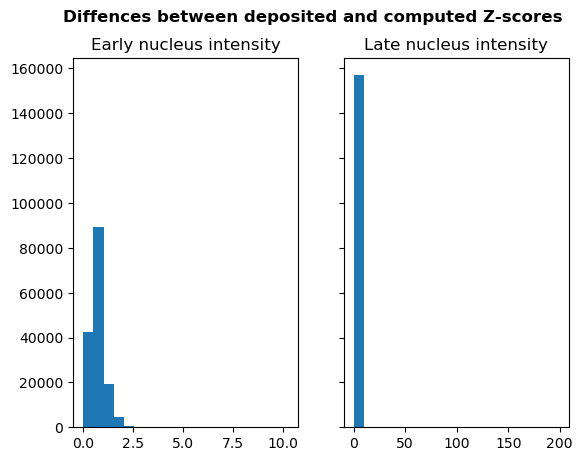

In [29]:
from matplotlib import pyplot as plt

diffs = [early_differences, late_differences]
ax_titles = ["Early nucleus intensity", "Late nucleus intensity"]

fig, axs = plt.subplots(1, 2, sharey=True)

fig.suptitle(
    "Diffences between deposited and computed Z-scores",
    fontweight="bold"
)

for ax, diff, ax_title in zip(axs, diffs, ax_titles):
    ax.set_title(ax_title)
    bin_vals, bin_edges, _ = ax.hist(diff, bins=20)
    print(bin_vals)
    print(bin_edges)
    print()

plt.show()

fig.savefig(
    "histograms_for_control_Z_scores/histogram_differences_computed_"
    "and_deposited_Z_scores_unconfined_range.png",
    dpi=300
)

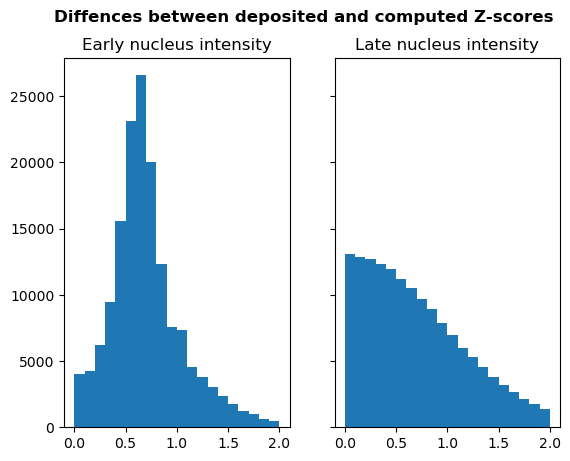

In [30]:
# Interestingly enough, there are Z-score pairs having a difference of
# about 10 and 190 in the case of early and late intensity, respectively
# In order to obtain a more fine-grained view, the upper range of the
# bins is set to 2
fig, axs = plt.subplots(1, 2, sharey=True)

fig.suptitle(
    "Diffences between deposited and computed Z-scores",
    fontweight="bold"
)

for ax, diff, ax_title in zip(axs, diffs, ax_titles):
    ax.set_title(ax_title)
    bin_vals, bin_edges, _ = ax.hist(diff, bins=20, range=(diff.min(), 2))

plt.show()

fig.savefig(
    "histograms_for_control_Z_scores/histogram_differences_computed_"
    "and_deposited_Z_scores_upper_limit_2.png",
    dpi=300
)

In [31]:
# Deviation of the computed Z-scores from the deposited ones might stem
# from the fact that some wells/measurements are of bad quality
# It is investigated whether discarding bad quality wells reduces the
# amount of controls
reliable_wells_only_control_subset_df = control_subset_df[
    control_subset_df["WELL_QUALITY_STATUS"] != "BAD"
]

n_reliable_controls = len(
    set(reliable_wells_only_control_subset_df["ID_openBIS"])
)

if n_reliable_controls != 33:
    print(
        "Removing bad quality wells reduces the amount of available "
        f"controls from 33 to {n_reliable_controls}."
    )

In [32]:
# Fortunately, removing bad quality controls does not reduce the amount
# of available controls
# Thus, it is now investigated whether considering only reliable wells
# reduces deviations between computed and deposited Z-scores

# The entire procedure of computing the mean and standard deviation for
# early and late intensities each in a plate-wise manner, computing
# Z-scores, etc. has to be repeated

reliable_wells_only_pan_VACV_report_df = pan_VACV_report_df[
    pan_VACV_report_df["WELL_QUALITY_STATUS"] != "BAD"
]

early_val_pair_per_plate_reliable_wells = []
late_val_pair_per_plate_reliable_wells = []

for plate_id in plate_ids:
    plate_subset_df = reliable_wells_only_pan_VACV_report_df[
        reliable_wells_only_pan_VACV_report_df["Barcode"] == plate_id
    ]

    current_early_mean = np.nanmean(
        plate_subset_df[non_Z_scored_early_cols]
    )
    current_early_std = np.nanstd(
        plate_subset_df[non_Z_scored_early_cols]
    )
    early_val_pair_per_plate_reliable_wells.append(
        (current_early_mean, current_early_std)
    )

    current_late_mean = np.nanmean(
        plate_subset_df[non_Z_scored_late_cols]
    )
    current_late_std = np.nanstd(
        plate_subset_df[non_Z_scored_late_cols]
    )
    late_val_pair_per_plate_reliable_wells.append(
        (current_late_mean, current_late_std)
    )

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/4108938962.py:22: RuntimeWarning: Mean of empty slice
  current_early_mean = np.nanmean(
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/4108938962.py:32: RuntimeWarning: Mean of empty slice
  current_late_mean = np.nanmean(
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/4108938962.py:22: RuntimeWarning: Mean of empty slice
  current_early_mean = np.nanmean(
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.10/site-pac

In [33]:
# The above RuntimeWarnings stem from the fact that after removing bad
# quality wells, some plate IDs have been removed altogether
# To be more precise, `RuntimeWarning: Mean of empty slice` is raised by
# `np.nanmean`, whereas `RuntimeWarning: Degrees of freedom <= 0 for slice.`
# is raised by `np.nanstd`
# Hence, `NaN` is returned both as mean and standard deviation for the
# respective plate IDs
# However, this is not problematic during the computation of Z-scores as
# the slices yielded for the respective plate IDs are empty anyway

# Now that the mean as well as the standard deviation have successfully
# been computed for each plate, the Z-scores are computed
# It is proceeded in a plate-wise manner
for plate_id, early_val_pair, late_val_pair in zip(
    plate_ids,
    early_val_pair_per_plate_reliable_wells,
    late_val_pair_per_plate_reliable_wells
):
    reliable_wells_only_pan_VACV_report_df.loc[
        reliable_wells_only_pan_VACV_report_df["Barcode"] == plate_id,
        "dIntensity_cPathogen_eMean_oNuclei_nZScore"
    ] = (
        (reliable_wells_only_pan_VACV_report_df.loc[
            reliable_wells_only_pan_VACV_report_df["Barcode"] == plate_id,
            "dIntensity_cPathogen_eMean_oNuclei"
        ] - early_val_pair[0])
        /
        early_val_pair[1]
    )

    reliable_wells_only_pan_VACV_report_df.loc[
        reliable_wells_only_pan_VACV_report_df["Barcode"] == plate_id,
        "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
    ] = (
        (reliable_wells_only_pan_VACV_report_df.loc[
            reliable_wells_only_pan_VACV_report_df["Barcode"] == plate_id,
            "dIntensity_cLatePathogen_eMean_oNuclei"
        ] - late_val_pair[0])
        /
        late_val_pair[1]
    )

In [34]:
# Again, as the columns originally harbouring the deposited Z-scores in
# `reliable_wells_only_pan_VACV_report_df` have been overwritten, the
# TSV file has to be loaded again
pan_VACV_report_orig_vals_df = pd.read_csv(
    path_to_original_VACV_report,
    sep="\t"
)

reliable_wells_only_pan_VACV_report_orig_vals_df = (
    pan_VACV_report_orig_vals_df[
        pan_VACV_report_orig_vals_df["WELL_QUALITY_STATUS"] != "BAD"
    ]
)

deposited_early_Z_scores = reliable_wells_only_pan_VACV_report_orig_vals_df.loc[
    ~np.isnan(
        reliable_wells_only_pan_VACV_report_orig_vals_df[
            "dIntensity_cPathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]
computed_early_Z_scores = reliable_wells_only_pan_VACV_report_df.loc[
    ~np.isnan(
        reliable_wells_only_pan_VACV_report_orig_vals_df[
            "dIntensity_cPathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]

deposited_late_Z_scores = reliable_wells_only_pan_VACV_report_orig_vals_df.loc[
    ~np.isnan(
        reliable_wells_only_pan_VACV_report_orig_vals_df[
            "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
]
computed_late_Z_scores = reliable_wells_only_pan_VACV_report_df.loc[
    ~np.isnan(
        reliable_wells_only_pan_VACV_report_orig_vals_df[
            "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
        ]
    ),
    "dIntensity_cLatePathogen_eMean_oNuclei_nZScore"
]

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_928/1918928590.py:4: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  pan_VACV_report_orig_vals_df = pd.read_csv(


In [35]:
# Verify that the pairs of computed and deposited Z-scores have the same
# length
assert (
    len(deposited_early_Z_scores)
    ==
    len(computed_early_Z_scores)
), (
    "The amount of deposited early Z-scores does not match that of "
    "computed early Z-scores!"
)

assert (
    len(deposited_late_Z_scores)
    ==
    len(computed_late_Z_scores)
), (
    "The amount of deposited late Z-scores does not match that of "
    "computed late Z-scores!"
)

In [36]:
print(
    f"Amount of early Z-scores: {len(deposited_early_Z_scores):,}\n"
    f"Amount of late Z-scores: {len(deposited_late_Z_scores):,}"
)

Amount of early Z-scores: 155,074
Amount of late Z-scores: 155,074


In [37]:
early_differences = np.abs(
    deposited_early_Z_scores
    -
    computed_early_Z_scores
).values

late_differences = np.abs(
    deposited_late_Z_scores
    -
    computed_late_Z_scores
).values

In [38]:
print(early_differences)
print(late_differences)

print(early_differences.min())
print(late_differences.min())

[0.87959727 0.84821039 0.91724391 ... 0.69892627 0.13759069 0.09959262]
[0.56348776 0.7825789  0.71080242 ... 0.73669588 0.6963488  0.60943494]
9.240395041132388e-06
8.823872262753163e-06


[4.0496e+04 8.8452e+04 2.0171e+04 4.5140e+03 7.0400e+02 3.4400e+02
 2.3300e+02 8.2000e+01 3.2000e+01 1.2000e+01 7.0000e+00 6.0000e+00
 4.0000e+00 4.0000e+00 5.0000e+00 4.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 2.0000e+00]
[9.24039504e-06 5.13777472e-01 1.02754570e+00 1.54131394e+00
 2.05508217e+00 2.56885040e+00 3.08261863e+00 3.59638686e+00
 4.11015510e+00 4.62392333e+00 5.13769156e+00 5.65145979e+00
 6.16522803e+00 6.67899626e+00 7.19276449e+00 7.70653272e+00
 8.22030095e+00 8.73406919e+00 9.24783742e+00 9.76160565e+00
 1.02753739e+01]

[1.55021e+05 3.60000e+01 8.00000e+00 3.00000e+00 4.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00]
[8.82387226e-06 8.99686197e+00 1.79937151e+01 2.69905682e+01
 3.59874214e+01 4.49842745e+01 5.39811277e+01 6.29779808e+01
 7.19748340e+01 8.09716871e+01 8.99685402e+01 9.89653934e+01
 1.07962247e+02 1.169591

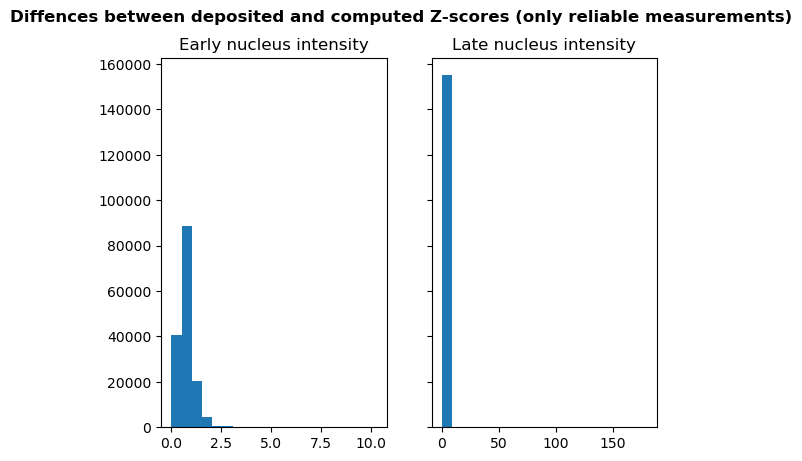

In [39]:
from matplotlib import pyplot as plt

diffs = [early_differences, late_differences]
ax_titles = ["Early nucleus intensity", "Late nucleus intensity"]

fig, axs = plt.subplots(1, 2, sharey=True)

fig.suptitle(
    "Diffences between deposited and computed Z-scores "
    "(only reliable measurements)",
    fontweight="bold"
)

for ax, diff, ax_title in zip(axs, diffs, ax_titles):
    ax.set_title(ax_title)
    bin_vals, bin_edges, _ = ax.hist(diff, bins=20)
    print(bin_vals)
    print(bin_edges)
    print()

plt.show()

fig.savefig(
    "histograms_for_control_Z_scores/histogram_differences_computed_"
    "and_deposited_Z_scores_no_WELL_QUALITY_STATUS_BAD_unconfined_"
    "range.png",
    dpi=300
)

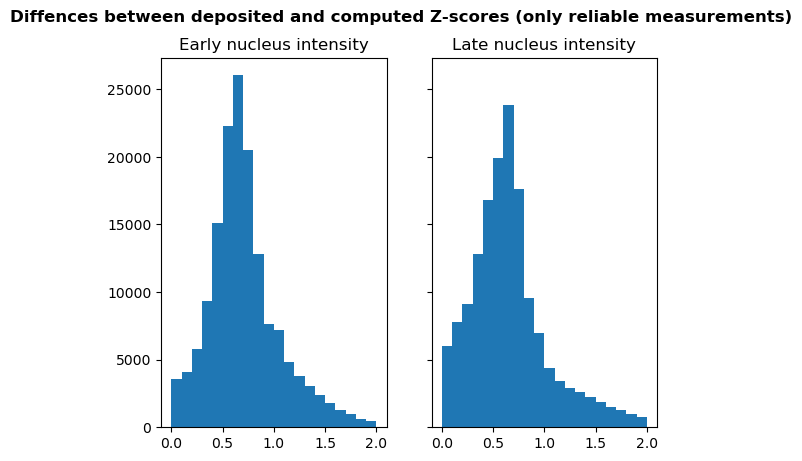

In [40]:
# While there are improvements for the late nucleus intensity,
# improvements for the early nucleus intensity are not recognisable

# As before, the upper range of the bins is set to 2
fig, axs = plt.subplots(1, 2, sharey=True)

fig.suptitle(
    "Diffences between deposited and computed Z-scores "
    "(only reliable measurements)",
    fontweight="bold"
)

for ax, diff, ax_title in zip(axs, diffs, ax_titles):
    ax.set_title(ax_title)
    ax.hist(diff, bins=20, range=(diff.min(), 2))

plt.show()

fig.savefig(
    "histograms_for_control_Z_scores/histogram_differences_computed_"
    "and_deposited_Z_scores_no_WELL_QUALITY_STATUS_BAD_upper_limit_"
    "2.png",
    dpi=300
)

In [41]:
# Focus on individual measurements
# Consider the reliable measurements of the pan VACV report
early_ints_orig_vals = reliable_wells_only_pan_VACV_report_orig_vals_df.loc[
    ~np.isnan(reliable_wells_only_pan_VACV_report_orig_vals_df[
        "dIntensity_cPathogen_eMean_oNuclei_nZScore"
    ]),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]

early_ints_computed_vals = reliable_wells_only_pan_VACV_report_df.loc[
    ~np.isnan(reliable_wells_only_pan_VACV_report_orig_vals_df[
        "dIntensity_cPathogen_eMean_oNuclei_nZScore"
    ]),
    "dIntensity_cPathogen_eMean_oNuclei_nZScore"
]

assert (
    len(early_ints_orig_vals)
    ==
    len(early_ints_computed_vals)
)

In [42]:
for i in range(10):
    print(f"Deposited value: {early_ints_orig_vals.iloc[i]}")
    print(f"Computed value: {early_ints_computed_vals.iloc[i]}")
    print()

Deposited value: -0.13797
Computed value: 0.7416272684170856

Deposited value: 0.62131
Computed value: 1.4695203882975205

Deposited value: -1.048
Computed value: -0.13075608637856542

Deposited value: -0.36817
Computed value: 0.520943043256683

Deposited value: 0.39804
Computed value: 1.2554739176517387

Deposited value: -1.3483
Computed value: -0.4186319527859539

Deposited value: -1.3642
Computed value: -0.43392750110259776

Deposited value: -1.2759
Computed value: -0.3492513726455971

Deposited value: -0.48916
Computed value: 0.4049563058449636

Deposited value: -0.93965
Computed value: -0.026916608628209136



In [44]:
print(early_ints_orig_vals.min())
print(early_ints_orig_vals.max())

-8.2057
27.0334


In [45]:
print(early_ints_computed_vals.min())
print(early_ints_computed_vals.max())

-3.509837693581829
16.758026118498748
